# Connecting to Database

The Python standard for database interfaces is the **Python DB-API**.In most of the cases one have  download a separate DB API module for each database access.

The DB API provides a minimal standard for working with databases using Python structures and syntax wherever possible. This API includes the following −

- Importing the API module.
- Acquiring a connection with the database.
- Issuing SQL statements and stored procedures.
- Closing the connection

## 1. Database Connection: SQlite3

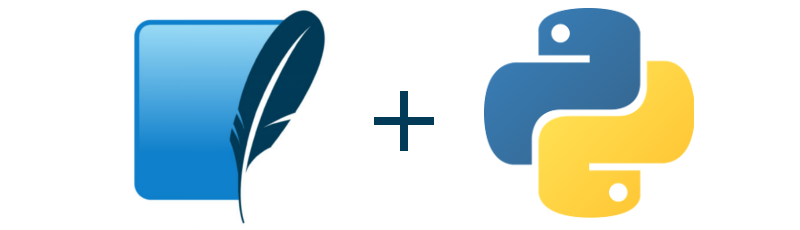

### What is SQLite?
SQLite is a relational database management system (In C) ,that implements a small, fast, self-contained, high-reliability, full-featured, SQL database engine.

- SQLite3 can be integrated with Python using sqlite3 module
- No need to install as it shipped by default along with Python version 2.5.x onwards.
- To use **sqlite3 module**, you must first create a connection object that represents the database and then optionally you can create a cursor object, which will help you in executing all the SQL statements.

### Important APIs

#### sqlite3.connect(database [,timeout ,other optional arguments])

- This API opens a connection to the SQLite database file. You can use ":memory:" to open a database connection to a database that resides in RAM instead of on disk. If database is opened successfully, it returns a connection object.

#### connection.cursor([cursorClass])

- This routine creates a cursor which will be used throughout of your database programming with Python. This method accepts a single optional parameter cursorClass.

#### cursor.execute(sql [, optional parameters])

- This routine executes an SQL statement. The SQL statement may be parameterized (i. e. placeholders instead of SQL literals). The sqlite3 module supports two kinds of placeholders: question marks and named placeholders (named style).

  For example − cursor.execute("insert into name values (?, ?)", (who, income))

#### connection.commit()

- This method commits the current transaction. If you don't call this method, anything you did since the last call to commit() is not visible from other database connections.

#### connection.rollback()

- This method rolls back any changes to the database since the last call to commit().

In [10]:
# Program to Connect to the exixting database
##If the database does not exist, then it will be created and finally a database object will be returned
import sqlite3

conn = sqlite3.connect('F.db')

print ("My first Connection")

My first Connection


In [11]:
# Program to create a table in the previously created database
conn = sqlite3.connect('F.db')
print ("Opened database successfully")

conn.execute('''CREATE TABLE COMPANY
         (ID INT PRIMARY KEY     NOT NULL,
         NAME           TEXT    NOT NULL,
         AGE            INT     NOT NULL,
         ADDRESS        CHAR(50),
         SALARY         REAL);''')
print ("Table created......")

conn.close()

Opened database successfully
Table created......


In [12]:
## to create records in the COMPANY table created in the above example.
conn = sqlite3.connect('F.db')
print ("Opened database successfully");

conn.execute("INSERT INTO COMPANY (ID,NAME,AGE,ADDRESS,SALARY) \
      VALUES (1, 'Ashi', 28, 'DELHI', 30000.00 )")

conn.execute("INSERT INTO COMPANY (ID,NAME,AGE,ADDRESS,SALARY) \
      VALUES (2, 'ROY', 26, 'GURGOAN', 18000.00 )")

conn.execute("INSERT INTO COMPANY (ID,NAME,AGE,ADDRESS,SALARY) \
      VALUES (3, 'Ted', 22, 'NOIDA', 22000.00 )")


conn.commit()
print ("Records updated successfully");
conn.close()

Opened database successfully
Records updated successfully


In [13]:
## how to fetch and display records from the COMPANY table created
conn = sqlite3.connect('F.db')
print ("Opened database successfully");

cursor = conn.execute("SELECT id, name, address, salary from COMPANY")
for row in cursor:
   print ("ID = ", row[0])
   print ("NAME = ", row[1])
   print ("ADDRESS = ", row[2])
   print ("SALARY = ", row[3], "\n")

print ("Record fetched");
conn.close()

Opened database successfully
ID =  1
NAME =  Ashi
ADDRESS =  DELHI
SALARY =  30000.0 

ID =  2
NAME =  ROY
ADDRESS =  GURGOAN
SALARY =  18000.0 

ID =  3
NAME =  Ted
ADDRESS =  NOIDA
SALARY =  22000.0 

Record fetched


In [6]:
## Update & Delete
conn = sqlite3.connect('First.db')
print ("Opened database successfully");
conn.execute("UPDATE COMPANY set SALARY = 25000.00 where ID = 1")## Updation
conn.execute("DELETE from COMPANY where ID = 2;")# Delete
conn.commit
cursor = conn.execute("SELECT id, name, address, salary from COMPANY")
for row in cursor:
   print ("ID = ", row[0])
   print ("NAME = ", row[1])
   print ("ADDRESS = ", row[2])
   print ("SALARY = ", row[3], "\n")

print ("Updated Record fetched");
conn.close()

Opened database successfully
ID =  1
NAME =  Ashi
ADDRESS =  DELHI
SALARY =  25000.0 

ID =  3
NAME =  Ted
ADDRESS =  NOIDA
SALARY =  22000.0 

Updated Record fetched


## 2. Database Connection : MongoDB

MongoDB is a cross-platform document-oriented database program. Classified as a NoSQL database program, MongoDB uses JSON-like documents with schemata. (Key : Value)

### Why MongoDB?

- The ever-increasing need for the ability to store complex data structures led to the birth of NoSQL databases, which allow a developer to store heterogeneous and structure-less data.
- MongoDB also provides load balancing support by automatically moving data across the various shards
- It has automatic failover support - in case your primary server goes down, a new primary will be up and running automatically
- The MongoDB Management Service or MMS is a very nice web tool that provides you with the ability to track your machines
- Deployment of MongoDB is very easy


**To install this package with conda run**

conda install -c anaconda pymongo 

**link to install MongoDB in windows**

https://medium.com/@LondonAppBrewery/how-to-download-install-mongodb-on-windows-4ee4b3493514

In [21]:
import pymongo

In [22]:
from pymongo import MongoClient 


In [23]:
# Creating Connection
from pymongo import MongoClient 
client = MongoClient() 


In [24]:
# connect the MongoClient on the localhost which runs on port number 27017
# client = MongoClient(‘host’, port_number) 
client = MongoClient("localhost", 27017)


In [25]:
# Access DataBase Objects 
mydatabase = client["MongoDB"]


In [26]:
## Accessing the Collection : Collections are equivalent to Tables in RDBMS. 
## We access a collection in PyMongo in the same way as we access the Tables in the RDBMS.
mongodata = mydatabase["mongoTable"]

### Note : MongoDB store data in following form

record = {

title: 'MongoDB and Python', 

description: 'MongoDB is no SQL database', 

tags: ['mongodb', 'database', 'NoSQL'], 

viewers: 104 
} 

In [30]:
## Insert the data inside a collection : 
#Methods used:insert_one() or insert_many()
rec={ 
"title": 'MongoDB and Python',  
"description": 'MongoDB is no SQL database',  
"tags": ['mongodb', 'database', 'NoSQL'],  
"viewers": 104 
} 
rec = mongodata.insert_one(rec) 


In [42]:
# find() is used to get more than one single document as a result of query.
for i in mydatabase.mongoTable.find({"title": 'MongoDB and Python'}) :
	print(i) 


{'_id': ObjectId('5cbb356e43883e168c762c86'), 'title': 'MongoDB and Python', 'description': 'MongoDB is no SQL database', 'tags': ['mongodb', 'database', 'NoSQL'], 'viewers': 104}


In [43]:
# count() is used to get the numbers of documents with the name as passed int he parameters.
print(mydatabase.mongoTable.count({"title": 'MongoDB and Python'})) 


1


C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: count is deprecated. Use estimated_document_count or count_documents instead. Please note that $where must be replaced by $expr, $near must be replaced by $geoWithin with $center, and $nearSphere must be replaced by $geoWithin with $centerSphere
  


In [45]:
# To print all the documents/entries inside ‘mongoTable’ of database ‘mydatabase’ 

try: 
	conn = MongoClient() 
	print("Connected successfully!!!") 
except: 
	print("Could not connect to MongoDB") 

# database name: mydatabase 
db = conn.mydatabase 

# Created or Switched to collection names: myTable 
collection = db.mongoTable 

# To find() all the entries inside collection name 'myTable' 
cursor = collection.find() 
for record in cursor: 
	print(record) 


Connected successfully!!!


In [47]:
# Python code to illustrate 
# Insert in MongoDB 
from pymongo import MongoClient 

try: 
	conn = MongoClient() 
	print("Connected successfully!!!") 
except: 
	print("Could not connect to MongoDB") 

# database 
db = conn.database 

# Created or Switched to collection names: my_gfg_collection 
collection = db.my_gfg_collection 

emp_rec1 = { 
		"name":"Naval", 
		"id":104, 
		"location":"Delhi"
		} 
emp_rec2 = { 
		"name":"Shruti", 
		"id":105, 
		"location":"Gurugoan"
		} 
emp_rec3 = { 
		"name":"Pogo", 
		"id":106, 
		"location":"Noida"
		} 

# Insert Data 
rec_id1 = collection.insert_one(emp_rec1) 
rec_id2 = collection.insert_one(emp_rec2) 
rec_id3 = collection.insert_one(emp_rec3) 
print("Data inserted with record ids",rec_id1," ",rec_id2,rec_id3) 

# Printing the data inserted 
cursor = collection.find() 
for record in cursor: 
	print(record) 


Connected successfully!!!
Data inserted with record ids <pymongo.results.InsertOneResult object at 0x0000029365F65988>   <pymongo.results.InsertOneResult object at 0x0000029366030C88> <pymongo.results.InsertOneResult object at 0x0000029365F40C08>
{'_id': ObjectId('5cbb36f743883e168c762c8a'), 'name': 'Mr.Geek', 'eid': 24, 'location': 'delhi'}
{'_id': ObjectId('5cbb36f743883e168c762c8b'), 'name': 'Mr.Shaurya', 'eid': 14, 'location': 'delhi'}
{'_id': ObjectId('5cbb36f743883e168c762c8c'), 'name': 'Mr.Coder', 'eid': 14, 'location': 'gurugram'}
{'_id': ObjectId('5cbb376143883e168c762c8e'), 'name': 'Naval', 'id': 104, 'location': 'Delhi'}
{'_id': ObjectId('5cbb376143883e168c762c8f'), 'name': 'Shruti', 'id': 105, 'location': 'Gurugoan'}
{'_id': ObjectId('5cbb376143883e168c762c90'), 'name': 'Pogo', 'id': 106, 'location': 'Noida'}


In [48]:
# Python code to illustrate 
# Replace_one() in MongoDB 
from pymongo import MongoClient 

try: 
	conn = MongoClient() 
	print("Connected successfully!!!") 
except: 
	print("Could not connect to MongoDB") 

# database 
db = conn.database 

# Created or Switched to collection names: my_gfg_collection 
collection = db.my_gfg_collection 

# replace one of the employee data whose name is Mr.Shaurya 
result = collection.replace_one( 
		{"name":"Mr.Shaurya"}, 
		{ 
				"name":"Roy", 
				"id":108, 
				"location":"Noida"
				
				} 
		) 

print("Data replaced with id",result) 

# Print the new record 
cursor = collection.find() 
for record in cursor: 
	print(record) 


Connected successfully!!!
Data replaced with id <pymongo.results.UpdateResult object at 0x0000029365F76308>
{'_id': ObjectId('5cbb36f743883e168c762c8a'), 'name': 'Mr.Geek', 'eid': 24, 'location': 'delhi'}
{'_id': ObjectId('5cbb36f743883e168c762c8b'), 'name': 'Roy', 'id': 108, 'location': 'Noida'}
{'_id': ObjectId('5cbb36f743883e168c762c8c'), 'name': 'Mr.Coder', 'eid': 14, 'location': 'gurugram'}
{'_id': ObjectId('5cbb376143883e168c762c8e'), 'name': 'Naval', 'id': 104, 'location': 'Delhi'}
{'_id': ObjectId('5cbb376143883e168c762c8f'), 'name': 'Shruti', 'id': 105, 'location': 'Gurugoan'}
{'_id': ObjectId('5cbb376143883e168c762c90'), 'name': 'Pogo', 'id': 106, 'location': 'Noida'}
